# Pandas (продолжение)

In [2]:
import pandas as pd
import numpy as np

## Упражнение 1

Найдите и выведи индексы пропущенных значений.
Заполните пропущеные значения следующими способами: 

1) Среднимим значения 
2) Медианными значениями 
3) Наиболее часто встечающимися 
4) Линейной интерполяцией 

In [3]:
df = pd.DataFrame({
'ord_no': [70001, np.nan, 70002, 70004, np.nan, 70005, np.nan, 70010, 70003, 70012, np.nan, 70013],
'purch_amt': [150.5, np.nan, 65.26, 110.5, 948.5, np.nan, 5760, 1983.43, np.nan, 250.45, 75.29, 3045.6],
'sale_amt': [10.5, 20.65, np.nan, 11.5, 98.5, np.nan, 57, 19.43, np.nan, 25.45, 75.29, 35.6],
'ord_date': ['2012-10-05', '2012-09-10', np.nan, '2012-08-17', '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', '2012-10-10', '2012-06-27', '2012-08-17', '2012-04-25'],
'customer_id': [3002, 3001, 3001, 3003, 3002, 3001, 3001, 3004, 3003, 3002, 3001, 3001],
'salesman_id': [5002, 5003, 5001,np.nan, 5002, 5001, 5001,np.nan, 5003, 5002, 5003,np.nan]})

In [4]:
df

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,NaN,NaN,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,NaN,NaN,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,NaN
4,NaN,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,NaN,NaN,2012-07-27,3001,5001.0
6,NaN,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,NaN
8,70003.0,NaN,NaN,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


In [5]:
for col in df.columns:
  mask = df[col].notnull()
  print(col,' (Нулевые элементы)', ' == ', df[~mask][col].index.values)

ord_no  (Нулевые элементы)  ==  [ 1  4  6 10]
purch_amt  (Нулевые элементы)  ==  [1 5 8]
sale_amt  (Нулевые элементы)  ==  [2 5 8]
ord_date  (Нулевые элементы)  ==  [2]
customer_id  (Нулевые элементы)  ==  []
salesman_id  (Нулевые элементы)  ==  [ 3  7 11]


In [6]:
values = {'ord_no': df['ord_no'].mean(), 'purch_amt': df['purch_amt'].mean(), 'sale_amt': df['sale_amt'].mean(),
          'ord_date': pd.to_datetime(df['ord_date']).mean().strftime("%Y-%m-%d"),
          'customer_id': df['customer_id'].mean(), 'salesman_id': df['salesman_id'].mean(), }
df1 = df.fillna(value=values)
df1

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.00,150.500000,10.500000,2012-10-05,3002,5002.0
1,70006.25,1376.614444,20.650000,2012-09-10,3001,5003.0
2,70002.00,65.260000,39.324444,2012-08-20,3001,5001.0
3,70004.00,110.500000,11.500000,2012-08-17,3003,5002.0
4,70006.25,948.500000,98.500000,2012-09-10,3002,5002.0
5,70005.00,1376.614444,39.324444,2012-07-27,3001,5001.0
6,70006.25,5760.000000,57.000000,2012-09-10,3001,5001.0
7,70010.00,1983.430000,19.430000,2012-10-10,3004,5002.0
8,70003.00,1376.614444,39.324444,2012-10-10,3003,5003.0
9,70012.00,250.450000,25.450000,2012-06-27,3002,5002.0


In [7]:
values = {'ord_no': df['ord_no'].median(), 'purch_amt': df['purch_amt'].median(), 'sale_amt': df['sale_amt'].median(),
          'ord_date': pd.to_datetime(df['ord_date']).median().strftime("%Y-%m-%d"),
          'customer_id': df['customer_id'].median(), 'salesman_id': df['salesman_id'].median()}
df2 = df.fillna(value=values)
df2

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,70004.5,250.45,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,25.45,2012-09-10,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,5002.0
4,70004.5,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,250.45,25.45,2012-07-27,3001,5001.0
6,70004.5,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,5002.0
8,70003.0,250.45,25.45,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


In [12]:
for column in df.columns:
    if column != 'ord_date':
        df[column] = df[column].interpolate()
df

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.500,2012-10-05,3002,5002.0
1,70001.5,107.88,20.650,2012-09-10,3001,5003.0
2,70002.0,65.26,16.075,2012-09-10,3001,5001.0
3,70004.0,110.50,11.500,2012-08-17,3003,5001.5
4,70004.5,948.50,98.500,2012-09-10,3002,5002.0
5,70005.0,3354.25,77.750,2012-07-27,3001,5001.0
6,70007.5,5760.00,57.000,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.430,2012-10-10,3004,5002.0
8,70003.0,1116.94,22.440,2012-10-10,3003,5003.0
9,70012.0,250.45,25.450,2012-06-27,3002,5002.0


## Упражнение 2


DataFrame дан ниже


1. Найдите все алмазы которые по любому линейному размеру больше 5.

2. Создайте новый DataFrame в которому исключены все не чсиловые столбы исходного DataFrame. 

3. Расчитатйте средние значения для каждого столбца

4. Пострйоет график средних цен для каждой категории (cut) алмазов.

5. Постройте гистрограмму  веса ('carat') алмазов.

6. Посчитаете все пропущенные занчения в Dataframe

7. Создайте новый DataFrame в которому исключены все строки с пропущенными занчениями

8. Узнайте реальное использование оперативной памяти вашим DataFrame

9. Напишите функцию возращающую 20 случайныз строчек из DataFrame (без повторений)

In [20]:
import os
import psutil
import random as rnd
import sys

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
import pandas as pd
diamonds = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [15]:
new_diamonds = diamonds[(diamonds['x'] > 5) | (diamonds['y'] > 5) | (diamonds['z'] > 5)]
new_diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
90,0.70,Ideal,E,SI1,62.5,57.0,2757,5.70,5.72,3.57
91,0.86,Fair,E,SI2,55.1,69.0,2757,6.45,6.33,3.52
92,0.70,Ideal,G,VS2,61.6,56.0,2757,5.70,5.67,3.50
93,0.71,Very Good,E,VS2,62.4,57.0,2759,5.68,5.73,3.56
94,0.78,Very Good,G,SI2,63.8,56.0,2759,5.81,5.85,3.72
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [16]:
diam = pd.DataFrame()
for column in diamonds.columns:
    if diamonds[column].dtype == float:
        diam[column] = diamonds[column]
diam

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


In [18]:
pd.DataFrame({"Mean": diam.mean()})

,Mean
carat,0.797940
depth,61.749405
table,57.457184
x,5.731157
y,5.734526
z,3.538734


                 Price
cut                   
Fair       4358.757764
Good       3928.864452
Ideal      3457.541970
Premium    4584.257704
Very Good  3981.759891


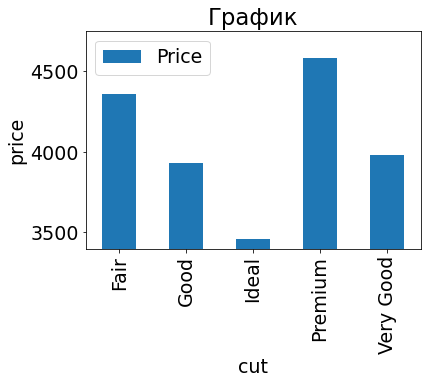

In [23]:
price = pd.DataFrame(diamonds.groupby(['cut']).agg(Price=('price', 'mean')))
print(price)

x_data = price.index.values
y_data = price['Price'].values

matplotlib.rcParams['font.size'] = 19
price.plot(kind='bar')
plt.title("График")
plt.xlabel('cut')
plt.ylabel('price')
plt.ylim((3400, 4750))
plt.show()

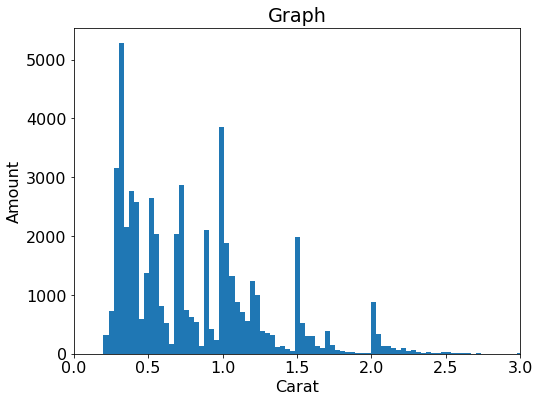

In [24]:
matplotlib.rcParams['font.size'] = 16

plt.figure(figsize=(8, 6))
plt.title('Graph')
plt.xlabel("Carat")
plt.ylabel("Amount")
plt.xlim((0, 3))

data = diamonds['carat']
plt.hist(data, 'auto')
plt.show()

In [25]:
notna = diamonds.dropna()
notna

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [27]:
print(sys.getsizeof(notna))
process = psutil.Process(os.getpid())
print(process.memory_info().rss)

12805568
233246720


In [28]:
diamonds.loc[sorted(rnd.sample(range(53940), 20))]

,carat,cut,color,clarity,depth,table,price,x,y,z
7034,0.90,Very Good,I,VVS1,63.5,58.0,4161,6.06,6.09,3.86
8239,1.03,Very Good,G,SI2,62.2,56.0,4374,6.46,6.49,4.03
10171,1.00,Fair,F,VS2,66.7,57.0,4732,6.11,6.04,4.05
16341,2.21,Premium,H,I1,62.2,58.0,6535,8.31,8.27,5.16
16894,1.10,Ideal,E,SI1,61.3,56.0,6743,6.65,6.70,4.09
18191,1.09,Very Good,G,VS1,62.5,58.0,7378,6.49,6.59,4.09
23741,2.00,Very Good,J,SI2,61.9,55.0,11792,8.06,8.09,5.00
24117,2.01,Very Good,I,SI1,63.5,55.0,12271,8.07,8.01,5.11
28257,0.33,Premium,F,VS2,62.2,58.0,666,4.43,4.44,2.76
33567,0.43,Ideal,D,SI1,61.5,56.0,830,4.82,4.87,2.98


## Упражнение 3
##### ~определенно не баян~ classic

Наконец-то, пришло время взяться за настоящий дата инжениринг и дата саенс. Датасет [титаник](https://www.kaggle.com/c/titanic).

1. Найдите два отдельных распределения по классам и возрастам пассажиров Титаника.
2. Разделите на две возрастные группы такие, что в них входят одинаковое количество пассажиров определенного класса. Определить такие группы для каждого пола (male/female)
3. На основе полученных групп определите доли выживших. (должно получится 6 чисел)
4. Найдите средний возраст выжившего для каждого из полов на основе полного набора данных
5. Найдите несмещенное среднеквадратическое отклонение возраста для выживших
6. Постройте график зависимости доли выживаемости от возроста
7. Постройте куммулятивный график выживаемости в зависимости от возраста для разных полов
8. Определите общие расходы пассажиров
9. Средих всех пассажиров найдите Екатерин (`Kate`, `Katerina`, `Ekaterina` ...)
10. `*`Определите имена для мужчин и женщин, которые чаще остальных встречались на корабле. Выведите список первых пяти.

In [4]:
import pandas as pd

titanic = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
